In [68]:
#importing dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

#reading in spotify data as a data frame
file = "Resources/SpotifyFeatures.csv"
spotify_data = pd.read_csv(file)

In [72]:
#selecting rows that only have popularity greater than or equal to 50%
# spotify_data = spotify_data.loc[(spotify_data["popularity"] >= 90)]

#dropping the track_id and duration_ms columns because it won't be used in analysis
try:
    spotify_data.drop('track_id', axis=1, inplace=True)
    spotify_data.drop('duration_ms', axis=1, inplace=True)
except:
    print("Columns have been dropped.")

In [73]:
#renaming and cleaning up all columns in the data frame
spotify_data.columns = ['Genre', 'Artist Name', 'Track Name', 'Popularity', 'Acousticness', 'Danceability', 
                        'Energy', 'Instrumentalness', 'Key', 'Liveness', 'Loudness', 'Mode', 'Speechiness', 
                        'Tempo', 'Time Signature', 'Valence']
spotify_data

,Genre,Artist Name,Track Name,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0,0.61100,0.389,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),1,0.24600,0.590,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,3,0.95200,0.663,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0,0.70300,0.240,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,4,0.95000,0.331,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,Soul,Slave,Son Of Slide,39,0.00384,0.687,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,38,0.03290,0.785,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,47,0.90100,0.517,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,Soul,R.LUM.R,With My Words,44,0.26200,0.745,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


<function matplotlib.pyplot.show(close=None, block=None)>

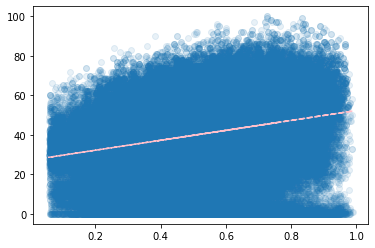

In [103]:
danceability = spotify_data["Danceability"]
popularity = spotify_data["Popularity"]

plt.scatter(danceability, popularity,alpha=0.1)
plt.plot(danceability, regress_values,linestyle="dashed", c="pink")

plt.show

In [75]:
correlation = st.pearsonr(danceability, popularity)
round(correlation[0],2)

0.26

In [102]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(danceability, popularity)
regress_values = danceability * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

<function matplotlib.pyplot.show(close=None, block=None)>

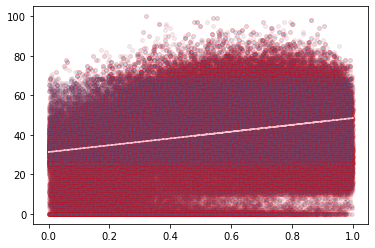

In [99]:
energy = spotify_data["Energy"]
popularity = spotify_data["Popularity"]

plt.scatter(energy, popularity,alpha=0.1,edgecolor="red", s=15)
plt.plot(energy, regress_values_energy,linestyle="dashed", c="pink")

plt.show

In [81]:
correlation = st.pearsonr(energy, popularity)
round(correlation[0],2)

0.25

In [83]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(energy, popularity)
regress_values_energy = energy * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

<function matplotlib.pyplot.show(close=None, block=None)>

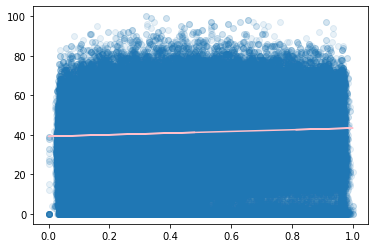

In [106]:
valence = spotify_data["Valence"]
popularity = spotify_data["Popularity"]

plt.scatter(valence, popularity,alpha=0.1)
plt.plot(valence, regress_values_valence, c="pink")

plt.show

In [86]:
correlation = st.pearsonr(valence, popularity)
round(correlation[0],2)

0.06

In [104]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(valence, popularity)
regress_values_valence = valence * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

<function matplotlib.pyplot.show(close=None, block=None)>

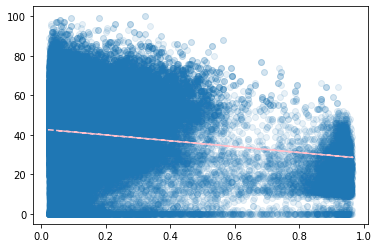

In [113]:
speechiness = spotify_data["Speechiness"]
popularity = spotify_data["Popularity"]

plt.scatter(speechiness, popularity, alpha=0.1)
plt.plot(speechiness, regress_values_speechiness,linestyle="dashed", c="pink")

plt.show

In [111]:
correlation = st.pearsonr(speechiness, popularity)
round(correlation[0],2)

-0.15

In [112]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(speechiness, popularity)
regress_values_speechiness = speechiness * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [ ]:
plt.bar()
plt.bar(count_regimen.index,popularity.values,
                    color = "purple", alpha = 0.3, width = 0.55)